   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Default Random Forest (10 trees) Accuracy: 0.9833

Confusion Matrix (Default Model):
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


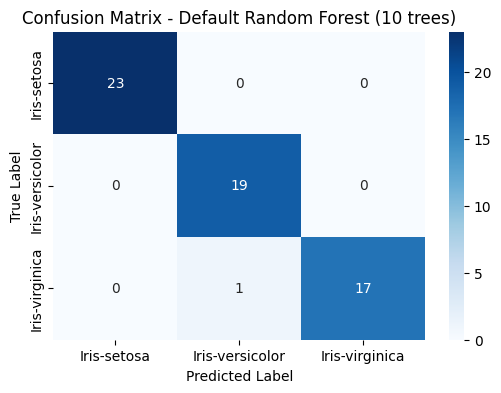


Classification Report (Default Model):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60


Best Accuracy: 1.0000 achieved with 1 trees

Confusion Matrix (Best Model):
[[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]


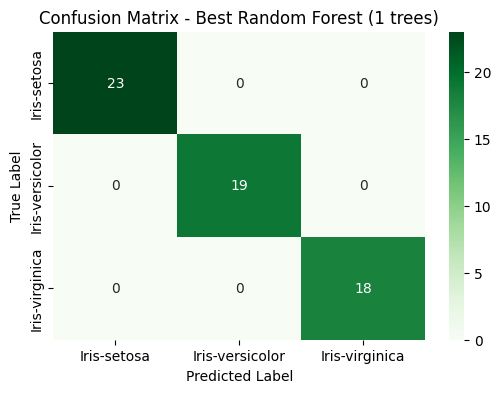


Classification Report (Best Model):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



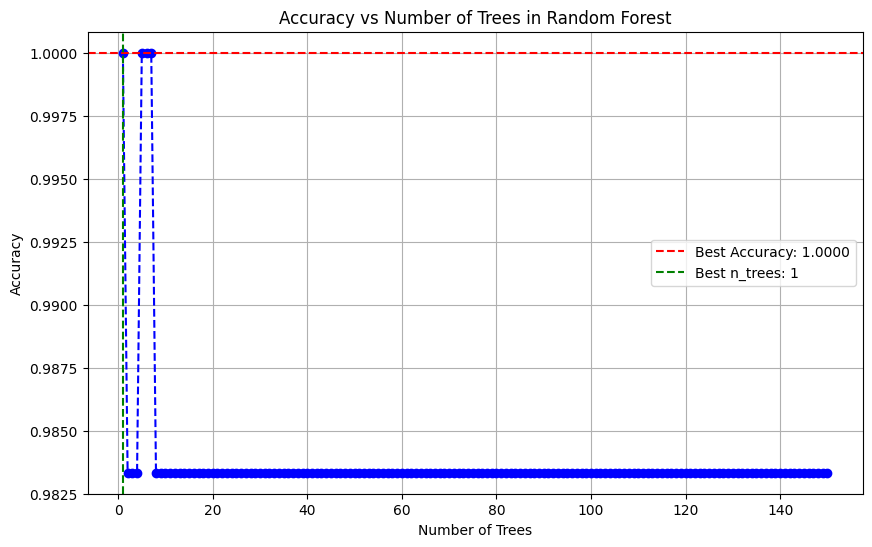

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv('/content/iris (4).csv')

# Check the first few rows to understand the structure
print(iris_data.head())

# Separate features and target
X = iris_data.drop('species', axis=1)  # Assuming the target column is named 'species'
y = iris_data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. Build Random Forest with default n_estimators (10)
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"\nDefault Random Forest (10 trees) Accuracy: {default_accuracy:.4f}")

# Confusion matrix for default model
cm_default = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (Default Model):")
print(cm_default)

# Plot confusion matrix for default model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_default.classes_,
            yticklabels=rf_default.classes_)
plt.title('Confusion Matrix - Default Random Forest (10 trees)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for default model
print("\nClassification Report (Default Model):")
print(classification_report(y_test, y_pred_default))

# 2. Fine-tune by changing number of trees
n_trees_range = range(1, 151)  # Testing from 1 to 150 trees
accuracies = []

for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the best accuracy and corresponding number of trees
best_accuracy = max(accuracies)
best_n_trees = n_trees_range[accuracies.index(best_accuracy)]
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with {best_n_trees} trees")

# Build the best model
rf_best = RandomForestClassifier(n_estimators=best_n_trees, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Best Model):")
print(cm_best)

# Plot confusion matrix for best model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_best.classes_,
            yticklabels=rf_best.classes_)
plt.title(f'Confusion Matrix - Best Random Forest ({best_n_trees} trees)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# Plot accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, accuracies, color='blue', linestyle='dashed', marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_accuracy:.4f}')
plt.axvline(x=best_n_trees, color='g', linestyle='--', label=f'Best n_trees: {best_n_trees}')
plt.legend()
plt.grid()
plt.show()